# Decaimiento radiactivo

Existen muchos modelos de decaimiento radiactivo, sin embargo, uno de los más sencillos es el considerar que la cantidad de material radioactivo decae de forma proporcional a la cantidad que tenga en un tiempo $t$. esto puede ser escrito de forma sencilla en el siguiente modelo:
$$\frac{\Delta N(t)}{\Delta t}\rightarrow\frac{dN}{dt}=\lambda N$$
Esta ecuación resulta de un promedio sobre un conjunto de atomos (Ensamble), esto se tiene para el caso en el que el numero de partículas $N\to\infty$ y el intervalo de observación $\Delta t \to 0$. La ecuación del modelo puede ser integrada y esta da como resultado algo llamado la ley de decaimiento de los núcleos.

El siguiente programa efectua una simulación de del decaimiento de un nucleo.

Tomado de del libro A Survey of Computational Physics Introductory Computational Science de Landau, Paez, Bordeianu (Python Multimodal eTextBook Beta4.0)

In [1]:
import numpy as np
import matplotlib.pylab as plt 
import random

In [2]:
Lambda = 0.001 # Decay c o n s t a n t
maximum = 200. ; timemax = 500 # Pa rams
number = nloop = maximum # I n i t i a l v a l u e
lambda1 = 0.001
maximum = 200. ; timemax = 500
number = nloop = maximum
for time in range(0 , timemax + 1 ) : # Time l o o p
    for atom in range(1 , int(number) + 1 ) : # Decay l o o p
        decay = random.random( )
        if(decay < Lambda):
            nloop +=  -1
        number = nloop

El programa anterior simula el numero de atomos en un nucleo en función del tiempo a partir de la generación de números aleatorios con distribución uniforme.
# Ejercicio 1
Modifique el codigo anterior para guardar los valores que se obtienen de tiempo y numero de atomos en el nucleo, prepare una gráfica en donde muestre cual es el comportamiento que tiene el número de atomos en función del tiempo.

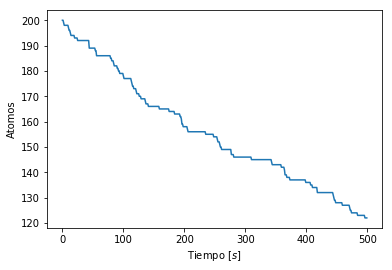

In [3]:
def sim_Atomos_t( Lambda=0.001, timemax=500, maximum=200 ): #Simula el numero de atomos en funcion del tiempo para un decaimiento radioactivo
                 # Decay c o n s t a n t, Pa rams, I n i t i a l v a l u e
    number = maximum 
    numbers = []
    for time in range(0 , timemax ) : # Time l o o p
        for atom in range( number ) : # Decay l o o p
            decay = random.random( )
            if(decay < Lambda):
                number +=  -1
        numbers.append(number)
    return numbers
numbers=sim_Atomos_t()
plt.plot(numbers)
plt.xlabel("Tiempo [$s$]")   # Establece el título del eje x
plt.ylabel("Atomos")   # Establece el título del eje y
plt.savefig("Comportamiento_Atomos(t).png")
#print(times,numbers)

# Ejercicio 2
Modifique el codigo efectuado en el ejercicio 1 con el fin de que no sólo se efectue el comportamiento de 1 nucleo si no que se efectue un ensamble de 1000 posibles comportamientos del número de atomos en el nucleo.
Efectue un promedio de todos los valores obtenidos para cada trayectoria y prepare una gráfica con el comportamiento del promedio.

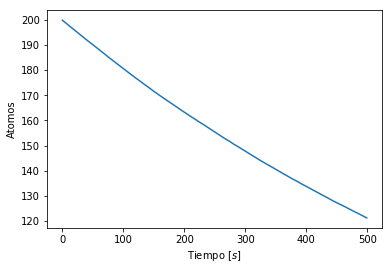

In [4]:
N=1000
Decaimientos=[]
for i in range(N):
    Decaimientos.append(sim_Atomos_t())
Decaimientos=np.array(Decaimientos)
numbers_pr=Decaimientos.sum( axis=0)/Decaimientos.shape[0]
    
plt.plot(numbers_pr)
plt.xlabel("Tiempo [$s$]")   # Establece el título del eje x
plt.ylabel("Atomos")   # Establece el título del eje y
plt.savefig("Comportamiento_Promedio_Atomos(t).png")

# Ejercicio 3
Tome una trayectoria de su preferencia y tome el logaritmo  del numero de atomos en el nucleo y grafique estos resultados, intente recrear la figura 5.5 del libro guia.

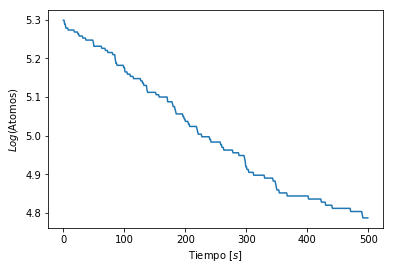

In [5]:
plt.plot(np.log(Decaimientos[458]))
plt.xlabel("Tiempo [$s$]")   # Establece el título del eje x
plt.ylabel("$Log$(Atomos)")   # Establece el título del eje y
plt.savefig("Comportamiento_Log(Atomos(t)).png")

# Ejercicio 4

Genere una gráfica en donde muestre que para distintos valores de $N(0)$ en el tiempo inicial, el comportamiento de $\ln(N(t)$ vs $t$ es invariante ante la escogencia de $N(0)$ 

/srv/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in log
  """


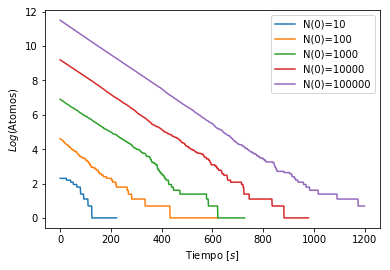

In [6]:
n=5
for i in range(n):
    number_inicial=10**(i+1)
    datos=sim_Atomos_t(Lambda=0.01,maximum=number_inicial,timemax=1200)
    plt.plot(np.log(datos),label="N(0)="+str(number_inicial))
plt.legend()
plt.xlabel("Tiempo [$s$]")   # Establece el título del eje x
plt.ylabel("$Log$(Atomos)")   # Establece el título del eje y
plt.savefig("Comportamiento_Log(Atomos(t))_Varios_Ni.png")

# Ejercicio 5

La función de autocorrelación se define como la correlación cruzada de la señal consigo misma. 
Esta función resulta de gran utilidad para encontrar patrones repetitivos dentro de una señal, como la periodicidad de una señal enmascarada bajo el ruido o para identificar la frecuencia fundamental de una señal que no contiene dicha componente, pero aparecen numerosas frecuencias armónicas de esta.

Esta función está dada por:


\begin{equation}
\varphi(i)=\frac{1}{N}\sum_{j=1}^{N} \left(x_j - \langle X\rangle\right)\left(x_{i+j}-\langle X\rangle\right) \tag{D2}
\end{equation}

Y tiene la propiedad de que si se cumple:
\begin{equation}
\varphi(i=0)=\frac{1}{N}\sum_{j=1}^{N} \left(x_j - \langle X\rangle\right)^2=\langle x_j - \langle X\rangle\rangle^2=\sigma^2\tag{D3}
\end{equation}

\begin{equation}
\varphi(i\ne 0)= \langle x_j - \langle X\rangle\rangle\langle x_{i\ne j} - \langle X\rangle\rangle=0\hspace{5mm}
(\rightarrow{\rm White\ noise})\hspace{-12mm}
\tag{D4}
\end{equation}

se denomina que el proceso estocastico es un ruido blanco o que no tiene correlación alguna más que en el momento en el que este fue generado.

Haciendo uso de la función de ``numpy`` "correlate" calcule la función de correlación para una secuencia de puntos generados a partir de una distribución uniforme.

In [7]:
sec_p=np.random.random(1000)
np.correlate(sec_p,sec_p)

array([329.91968954])